# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101360347-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button.png" height="40" />
</div>
<br>
</a>
<a href="https://www.paypal.com/ncp/payment/GN55W4UQ7VAMN" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button2.png" height="40" />
</div>
</a>

<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 52: Portfolio Optimization with Integer Constraints

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = [
          'JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA'
          ]
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end, auto_adjust=False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0256%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5784%,0.9482%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4864%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3107%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2735%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1386%,-0.9720%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0216%,0.0915%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0331%,...,1.6435%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5799%,-1.9919%


In [3]:
asset_classes = {'Assets': ['APA', 'BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE',
                            'HPQ', 'JCI', 'JPM', 'LUV', 'MMC', 'MO', 'MSFT', 'NI', 
                            'PCAR', 'PSA', 'SEE', 'T', 'TGT', 'TMO', 'TXT', 'VZ', 'ZION'],
                 'Industry': ['Energy', 'Financials', 'Health Care', 'Health Care',
                              'Consumer Discretionary', 'Utilities', 'Consumer Staples',
                              'Industrials', 'Information Technology', 'Consumer Discretionary',
                              'Financials', 'Industrials', 'Financials', 'Consumer Staples',
                              'Information Technology', 'Utilities', 'Industrials', 'Financials',
                              'Materials', 'Telecommunications Services', 'Consumer Discretionary',
                              'Health Care', 'Industrials', 'Telecommunications Services', 'Financials']
                 }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that minimize variance.

In [4]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,5.2376%,4.3880%,2.1298%,6.9905%,3.2270%,0.0743%,0.0000%,2.8448%,...,11.4531%,0.0000%,14.9252%,0.1669%,6.5901%,4.0899%,0.0000%,0.0000%,8.2769%,0.0001%


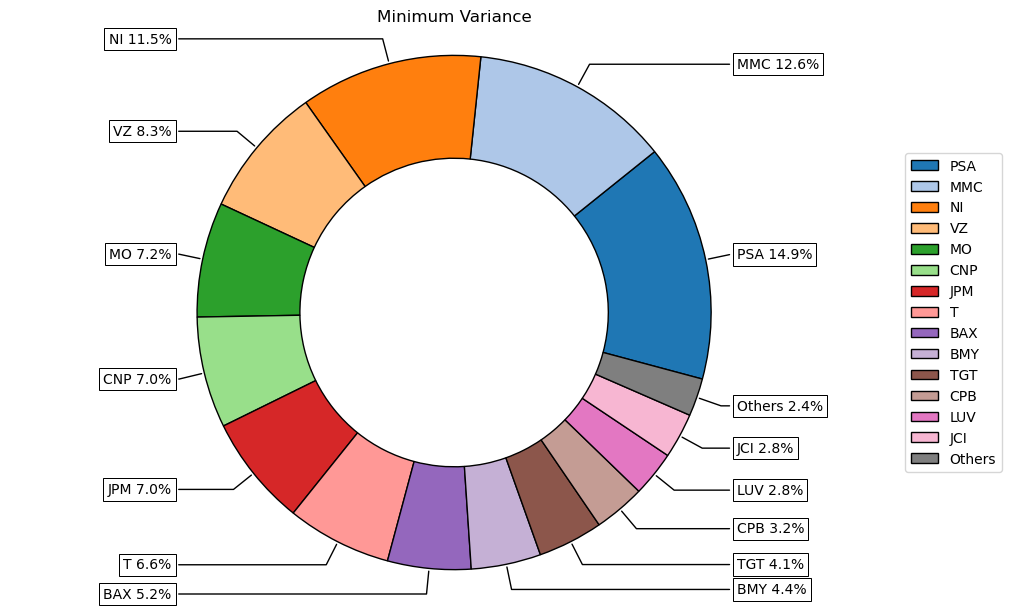

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [6]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
D0 = []
classes = asset_classes['Industry'].unique().tolist()
for i in classes:
    D1 = np.where(asset_classes['Industry'].values == i, 1, 0).tolist()
    D0.append(D1)
D0 = np.array(D0)
D0 = pd.DataFrame(D0, index=classes, columns=assets)
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 17 from 25
Number of Industries: 8 from 10


## 3. Estimating Mean Variance Portfolios with Integer Constraints

### 3.1 Upper Bound on the Maximum Number of Assets

In [7]:
# Upper bound on the maximum number of assets
constraints = {'Disabled': [False],
               'Type': ['Assets'],
               'Set': [''],
               'Position': [''],
               'Kind': ['CardUp'],
               'Value': [8.0],
               'Type Relative': [''],
               'Relative Set': [''],
               'Relative': ['']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# First we need to set a solver that support Mixed Integer Programming
port.solvers = ['MOSEK']

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,10.0007%,0.0000%,0.0000%,0.0000%,0.0000%,...,13.9716%,0.0000%,17.6645%,0.0000%,12.9806%,5.6202%,0.0000%,0.0000%,0.0000%,0.0000%


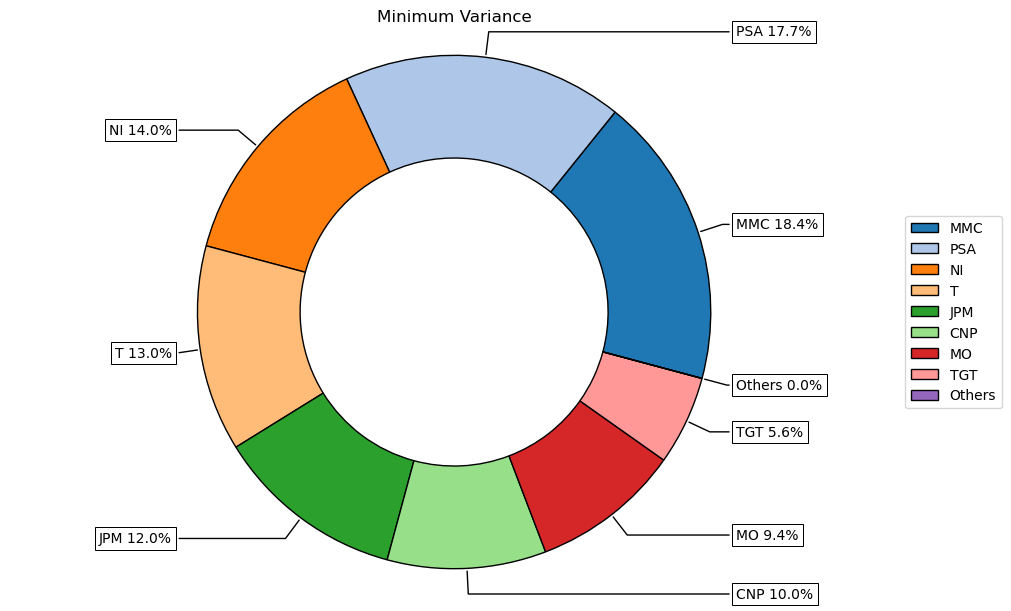

In [8]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [9]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 8 from 25
Number of Industries: 5 from 10


### 3.2 Lower Bound on the Minimum Number of Assets

In [10]:
# Lower bound on the minimum number of assets
constraints = {'Disabled': [False], 
               'Type': ['Assets'],
               'Set': [''],
               'Position': [''],
               'Kind': ['CardLow'],
               'Value': [20.0],
               'Type Relative': [''],
               'Relative Set': [''],
               'Relative': ['']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,2.0002%,3.7787%,3.8848%,2.0495%,6.3016%,3.4937%,2.0003%,0.0000%,2.0388%,...,11.8197%,0.0000%,14.8508%,2.0003%,6.1416%,3.7308%,2.0003%,0.0000%,8.0449%,2.0005%


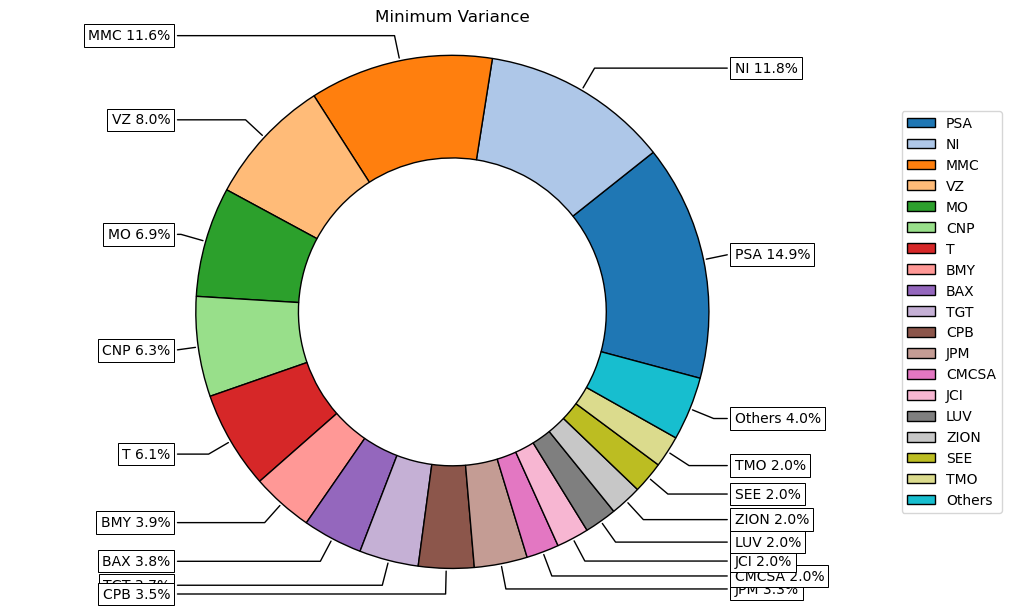

In [11]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [12]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 20 from 25
Number of Industries: 8 from 10


### 3.3 Mutually Exclusive Constraint Between Two Assets

In [13]:
# Mutually exclusive constraint between two assets
constraints = {'Disabled': [False],
               'Type': ['Assets'],
               'Set': [''],
               'Position': ['PSA'],
               'Kind': ['MuEx'],
               'Value': [''],
               'Type Relative': ['Assets'],
               'Relative Set': [''],
               'Relative': ['MMC']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,6.8900%,5.2403%,3.3318%,7.6708%,3.3471%,0.0000%,0.0000%,3.8627%,...,12.1197%,0.0000%,16.3114%,0.0000%,6.8259%,4.2021%,0.0000%,0.0000%,8.9311%,0.0000%


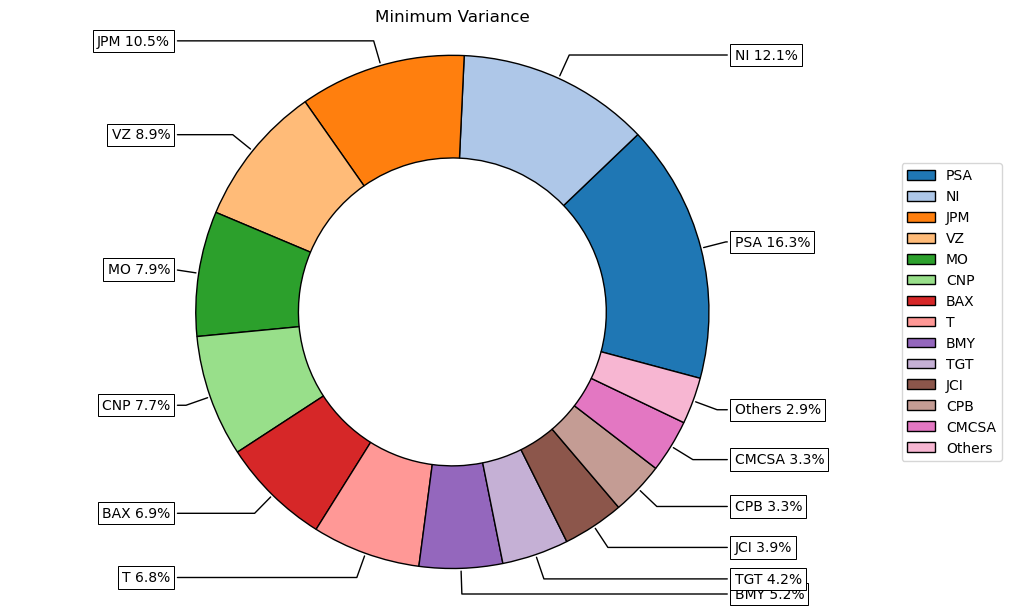

In [14]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [15]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 14 from 25
Number of Industries: 7 from 10


### 3.4 Join Investment Constraint Between Two Assets

In [16]:
# Join investment constraint between two assets
constraints = {'Disabled': [False],
               'Type': ['Assets'],
               'Set': [''],
               'Position': ['PSA'], 
               'Kind': ['Join'],
               'Value': [''],
               'Type Relative': ['Assets'],
               'Relative Set': [''],
               'Relative': ['MSFT']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.05

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,5.0001%,5.0001%,0.0000%,6.5817%,5.0000%,0.0000%,0.0000%,5.0000%,...,10.8234%,0.0000%,14.3486%,0.0000%,7.1351%,5.0000%,0.0000%,0.0000%,7.9361%,0.0000%


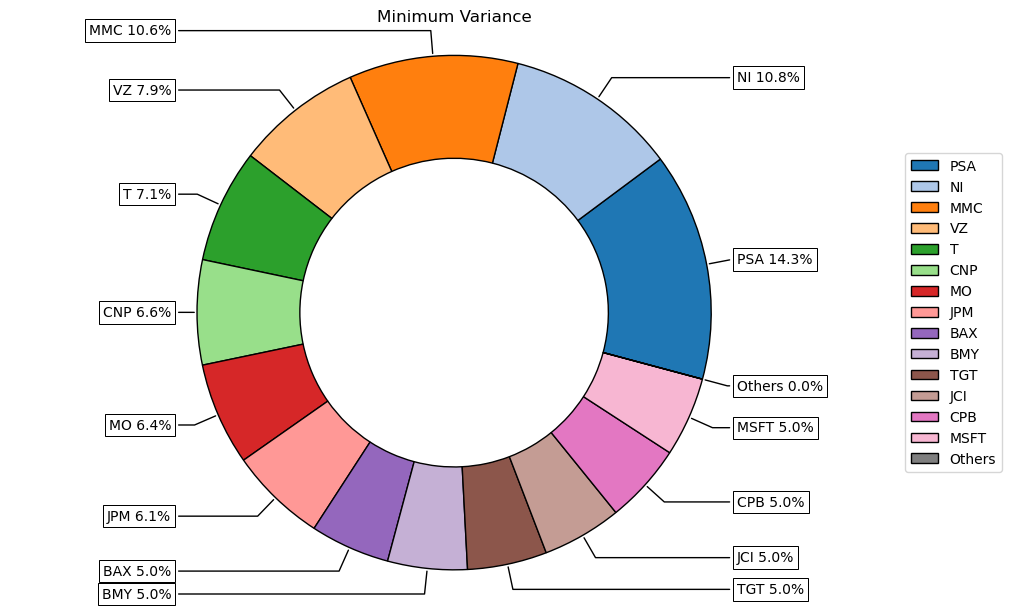

In [17]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [18]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 14 from 25
Number of Industries: 7 from 10


### 3.5 Upper Bound on the Maximum Number of Categories

In [19]:
# Upper boound on the maximum number of categories
constraints = {'Disabled': [False],
               'Type': ['Classes'], 
               'Set': ['Industry'],
               'Position': [''],
               'Kind': ['CardUp'],
               'Value': [5.0],
               'Type Relative': [''],
               'Relative Set': [''],
               'Relative': ['']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,6.6296%,4.9028%,0.0000%,6.7906%,3.6186%,0.0000%,0.0000%,0.0000%,...,11.8809%,0.0000%,15.9547%,0.0000%,8.4910%,0.0000%,0.0000%,0.0000%,8.6337%,0.0000%


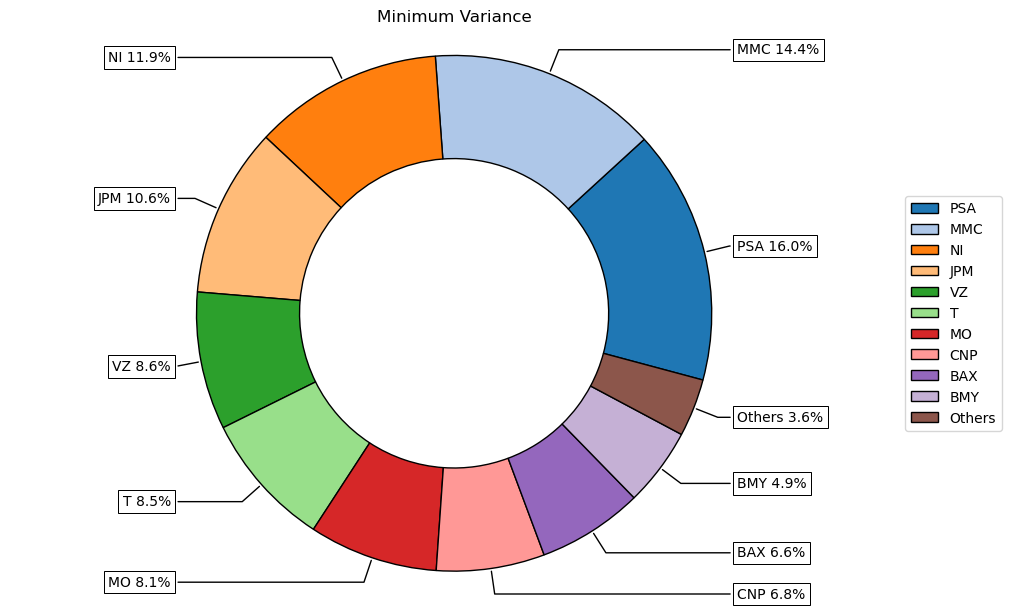

In [20]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [21]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 11 from 25
Number of Industries: 5 from 10


### 3.6 Lower Bound on the Minimum Number of Categories

In [22]:
# Lower bound on the minimum number of categories
constraints = {'Disabled': [False],
               'Type': ['Classes'],
               'Set': ['Industry'], 
               'Position': [''], 
               'Kind': ['CardLow'], 
               'Value': [9.0], 
               'Type Relative': [''], 
               'Relative Set': [''],
               'Relative': ['']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.05

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,5.0000%,5.0000%,0.0000%,5.7421%,5.0000%,0.0000%,0.0000%,0.0000%,...,11.0290%,0.0001%,13.4832%,5.0000%,6.4449%,5.0000%,0.0000%,0.0000%,7.3914%,0.0000%


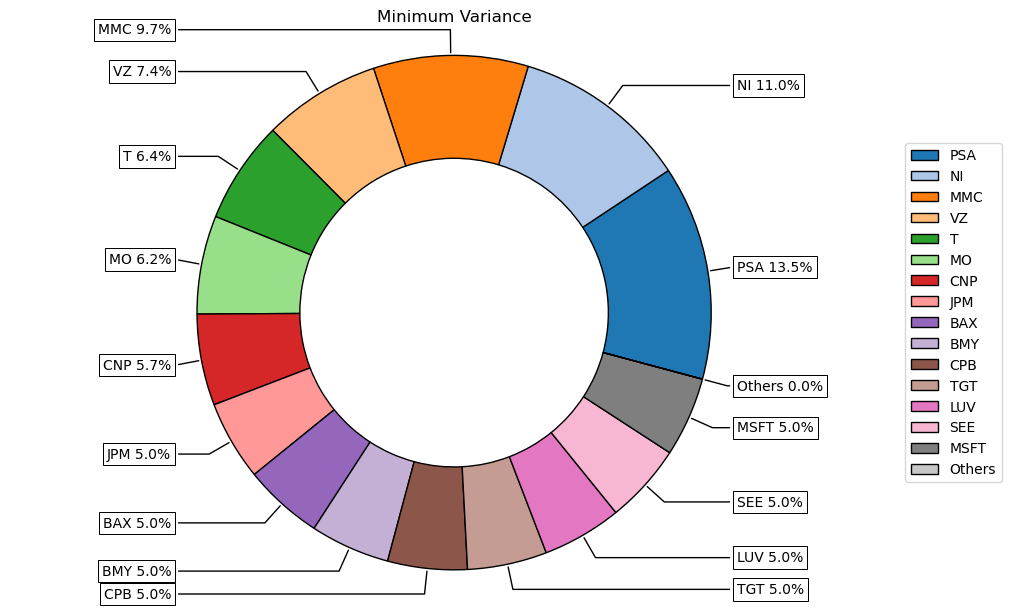

In [23]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [24]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 15 from 25
Number of Industries: 9 from 10


### 3.7 Upper Bound on the Maximum Number of Assets in All Categories

In [25]:
# Lower bound on the minimum number of categories
constraints = {'Disabled': [False],
               'Type': ['Classes'],
               'Set': ['Industry'], 
               'Position': ['All'], 
               'Kind': ['CardUp'], 
               'Value': [2.0], 
               'Type Relative': [''], 
               'Relative Set': [''],
               'Relative': ['']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,5.8159%,4.7149%,0.0000%,7.3612%,3.3005%,0.0000%,0.0000%,3.7592%,...,10.5048%,0.0000%,14.3219%,0.0000%,7.6009%,4.4262%,0.0000%,2.0000%,9.1379%,0.0000%


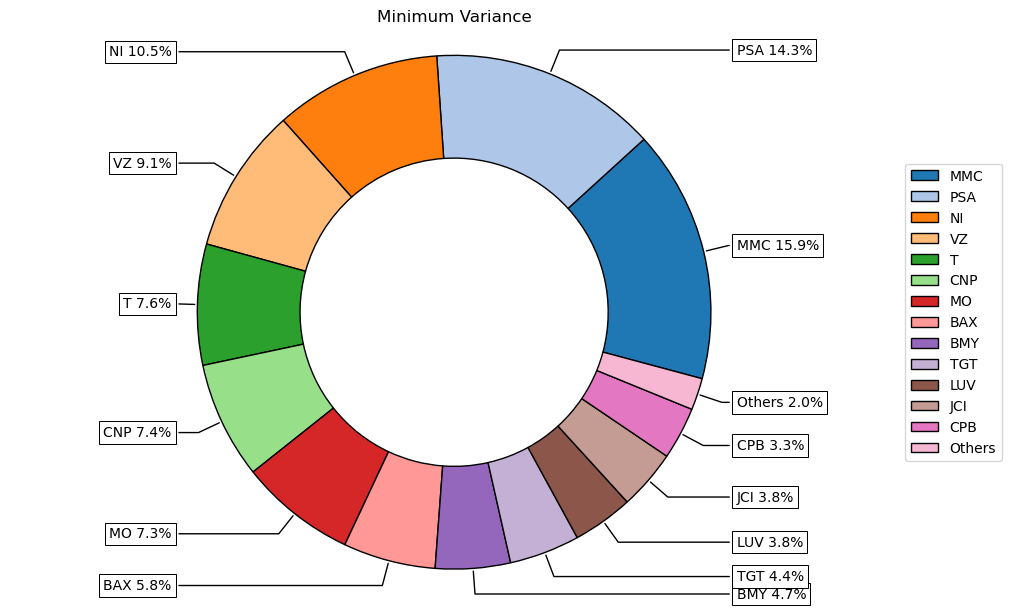

In [26]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [27]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 14 from 25
Number of Industries: 7 from 10


### 3.8 Lower Bound on the Minimum Number of Assets in All Categories

In [28]:
# Lower bound on the minimum number of categories
constraints = {'Disabled': [False],
               'Type': ['Classes'],
               'Set': ['Industry'], 
               'Position': ['All'], 
               'Kind': ['CardLow'], 
               'Value': [1.0], 
               'Type Relative': [''], 
               'Relative Set': [''],
               'Relative': ['']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.05

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,5.0000%,0.0000%,0.0000%,5.0010%,0.0000%,5.0066%,5.0004%,0.0000%,0.0000%,0.0000%,...,11.6114%,0.0000%,14.4588%,5.0001%,6.0015%,5.0003%,0.0000%,0.0000%,8.2992%,0.0000%


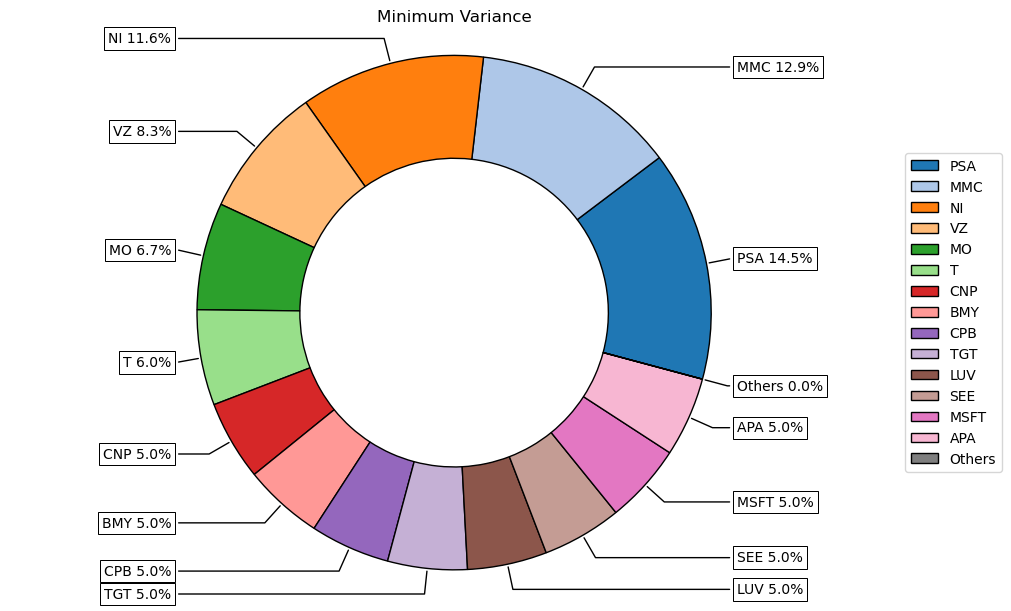

In [29]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [30]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 14 from 25
Number of Industries: 10 from 10


### 3.9 Upper Bound on the Maximum Number of Assets in a Category

In [31]:
# Upper bound on the maximum number of asset in a category
# Maximum one asset in Utilities
constraints = {'Disabled': [False],
               'Type': ['Classes'],
               'Set': ['Industry'], 
               'Position': ['Utilities'], 
               'Kind': ['CardUp'], 
               'Value': [1.0], 
               'Type Relative': [''],
               'Relative Set': [''],
               'Relative': ['']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,5.8437%,4.6282%,2.2862%,0.0000%,3.5604%,0.0000%,0.0000%,3.0832%,...,14.7368%,0.0000%,15.5053%,0.0000%,6.9111%,3.8117%,0.0000%,0.0000%,8.8309%,0.0000%


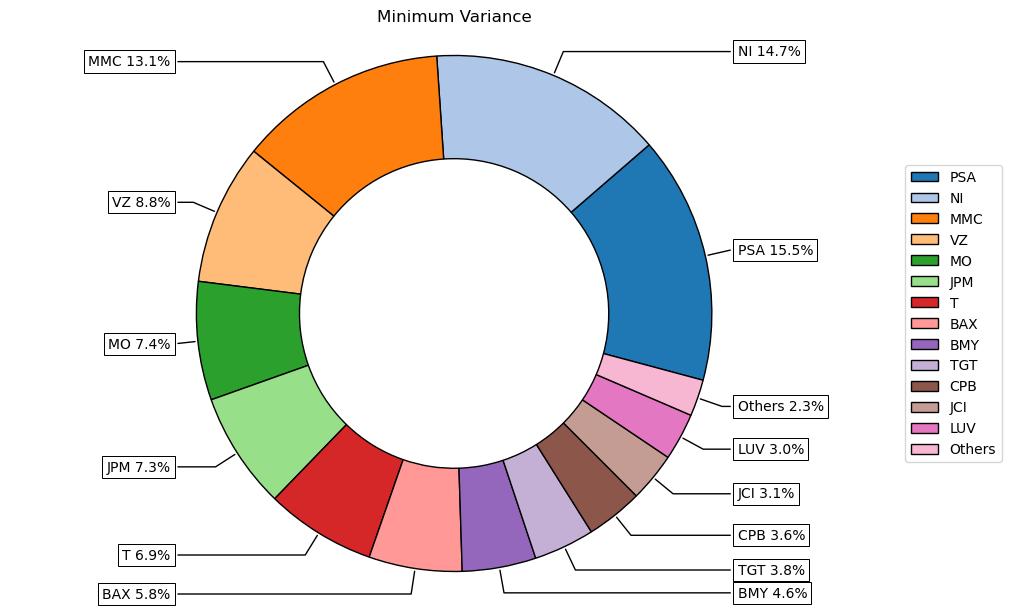

In [32]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [33]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 14 from 25
Number of Industries: 7 from 10


### 3.10 Lower Bound on the Minimum Number of Assets in a Category

In [34]:
# Lower bound on the minimum number of asset in a category
# Minimum one asset in Energy
constraints = {'Disabled': [False],
               'Type': ['Classes'], 
               'Set': ['Industry'], 
               'Position': ['Materials'], 
               'Kind': ['CardLow'], 
               'Value': [1.0], 
               'Type Relative': [''],
               'Relative Set': [''],
               'Relative': ['']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,5.0857%,4.2784%,2.1009%,6.7662%,3.1590%,0.0000%,0.0000%,2.7012%,...,11.5092%,0.0000%,14.7566%,2.0004%,6.5496%,4.0810%,0.0000%,0.0000%,8.1762%,0.0000%


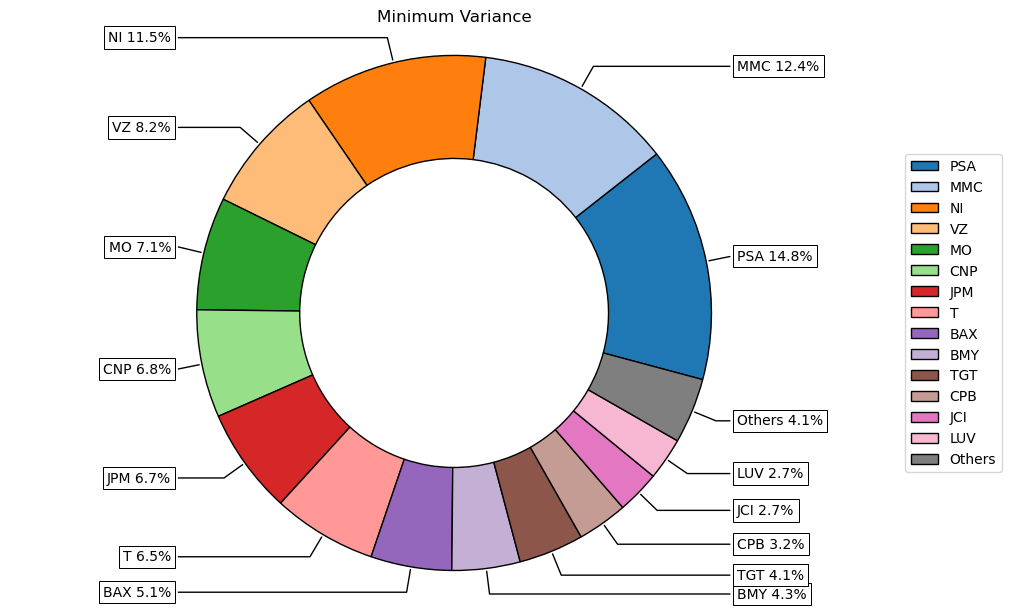

In [35]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [36]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 16 from 25
Number of Industries: 8 from 10


### 3.11 Mutually Exclusive Constraint Between a Category and a Asset

In [37]:
# Mutually exclusive constraint between a category and a asset
# Choose between Financials and CNP
constraints = {'Disabled': [False],
               'Type': ['Classes'],
               'Set': ['Industry'], 
               'Position': ['Financials'], 
               'Kind': ['MuEx'], 
               'Value': [''], 
               'Type Relative': ['Assets'],
               'Relative Set': [''],
               'Relative': ['CNP']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,5.8437%,4.6282%,2.2862%,0.0000%,3.5604%,0.0000%,0.0000%,3.0832%,...,14.7368%,0.0000%,15.5053%,0.0000%,6.9111%,3.8117%,0.0000%,0.0000%,8.8309%,0.0000%


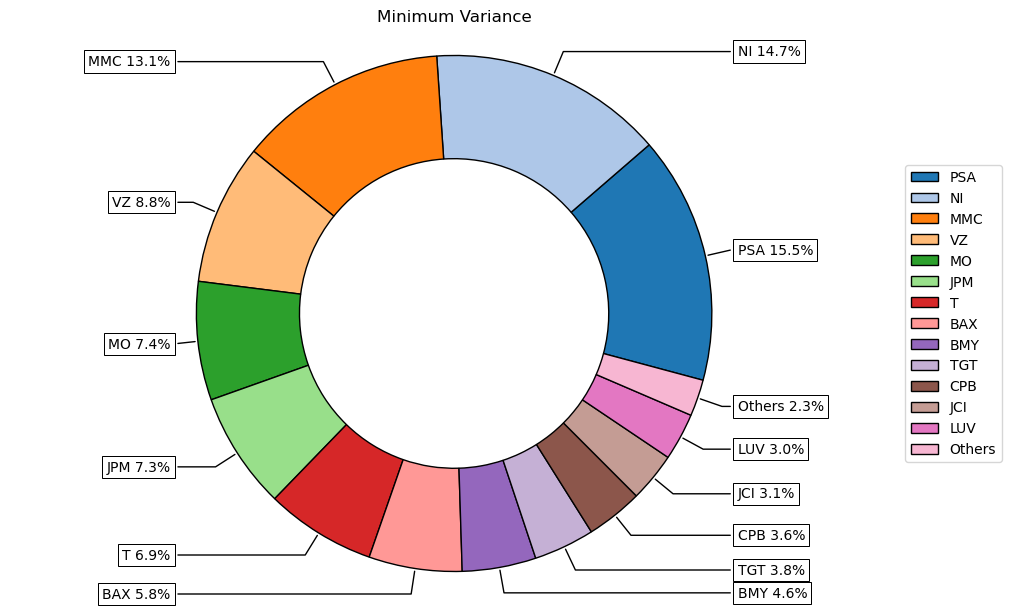

In [38]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [39]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 14 from 25
Number of Industries: 7 from 10


### 3.12 Mutually Exclusive Constraint Between Two Categories

In [40]:
# Mutually exclusive constraint between two categories
# Choose between Financials and Utilities
constraints = {'Disabled': [False],
               'Type': ['Classes'],
               'Set': ['Industry'], 
               'Position': ['Financials'], 
               'Kind': ['MuEx'], 
               'Value': [''], 
               'Type Relative': ['Classes'],
               'Relative Set': ['Industry'],
               'Relative': ['Utilities']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.02

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,7.2816%,5.1784%,2.6376%,0.0000%,5.1782%,0.0000%,0.0000%,3.6154%,...,0.0000%,0.0000%,20.0861%,0.0000%,7.2377%,3.6597%,0.0000%,0.0000%,12.2291%,0.0000%


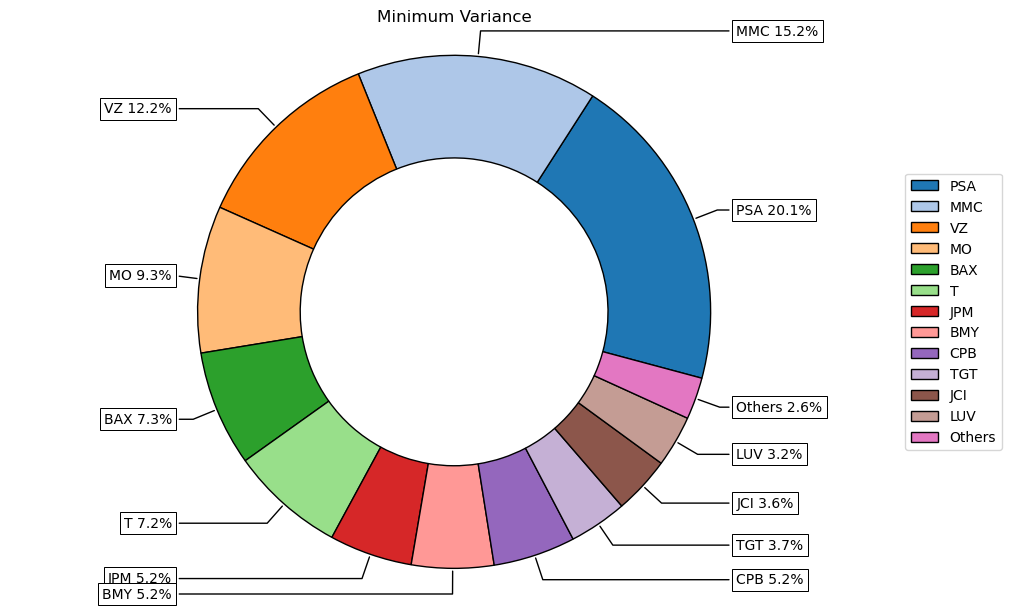

In [41]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [42]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 13 from 25
Number of Industries: 6 from 10


### 3.13 Join Investment Constraint Between a Category and a Asset

In [43]:
# Join investment constraint between a category and asset
# Choose Financials and MSFT at same time or not
constraints = {'Disabled': [False],
               'Type': ['Classes'],
               'Set': ['Industry'], 
               'Position': ['Financials'], 
               'Kind': ['Join'], 
               'Value': [''], 
               'Type Relative': ['Assets'],
               'Relative Set': [''],
               'Relative': ['MSFT']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.05

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.0000%,5.0000%,5.0000%,0.0000%,5.6431%,5.0000%,0.0000%,0.0000%,0.0000%,...,12.4396%,0.0000%,14.5502%,0.0000%,6.0365%,5.0000%,0.0000%,0.0000%,7.1345%,5.0000%


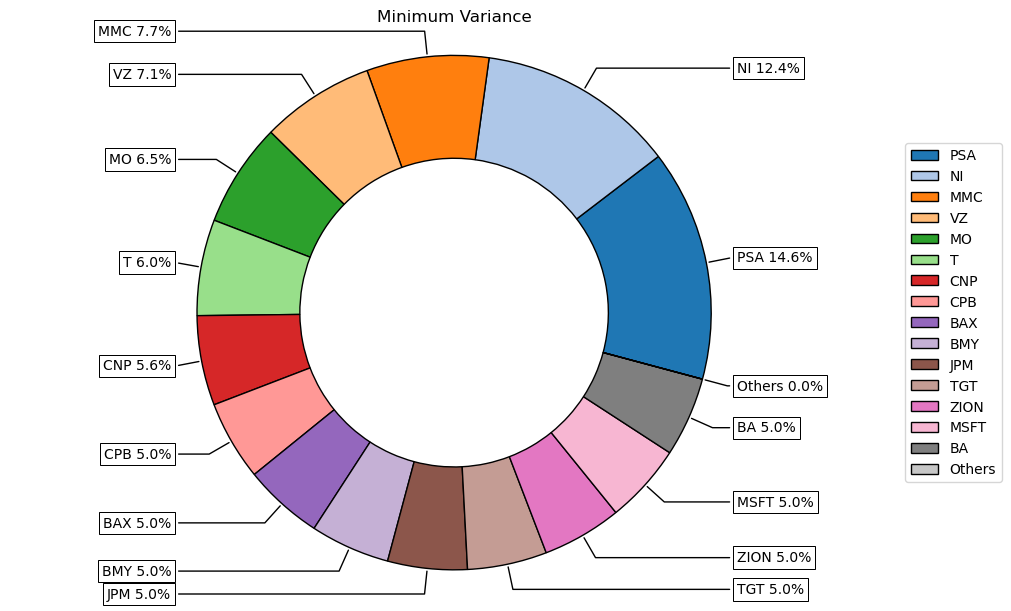

In [44]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [45]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 15 from 25
Number of Industries: 7 from 10


### 3.14 Join Investment Constraint Between Two Categories

In [46]:
# Join investment constraint between two categories
# Choose Financials and Information Technology at same time or not
constraints = {'Disabled': [False],
               'Type': ['Classes'],
               'Set': ['Industry'], 
               'Position': ['Financials'], 
               'Kind': ['Join'], 
               'Value': [''], 
               'Type Relative': ['Classes'],
               'Relative Set': ['Industry'],
               'Relative': ['Information Technology']}

constraints = pd.DataFrame(constraints)

A, B, C, D, E, F = rp.integer_constraints(constraints, asset_classes)

# Then we need to set the integer constraint
port.aintinequality = A
port.bintinequality = B
port.cintinequality = C
port.dintinequality = D
port.eintinequality = E
port.fintinequality = F

# Optionally, we can set the minimum weight of assets
port.lowerlng = 0.05

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.0000%,0.0000%,5.0001%,0.0000%,5.3870%,5.0001%,0.0000%,5.0000%,0.0000%,...,13.0431%,0.0000%,15.2075%,0.0000%,5.2927%,5.0000%,0.0000%,0.0000%,7.4950%,5.0000%


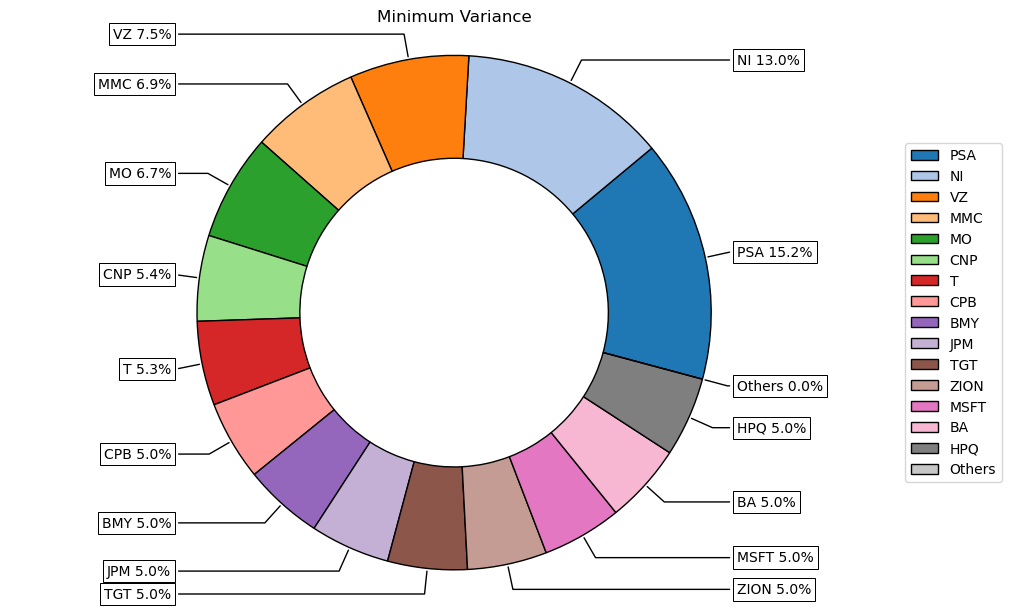

In [47]:
ax = rp.plot_pie(w=w,
                 title='Minimum Variance',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

In [48]:
# Number of assets in portfolio
n_assets = np.sum(np.where(np.round(w, 4) > 0, 1, 0)).item()

# Number of industries in portfolio
n_industries = np.sum(np.where(np.round(D0 @ w, 4) > 0, 1, 0)).item()

print('Number of Assets    :', n_assets, 'from', w.shape[0])
print('Number of Industries:', n_industries, 'from', D0.shape[0])

Number of Assets    : 15 from 25
Number of Industries: 7 from 10
